# 1_Initialization

In [1]:
from safedigital import mechanical as ME  # import mechanical module
from datetime import datetime
from datetime import timedelta
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from MRC.sswgmm_mech import mech_monitor as mm
sns.set(color_codes=True)
cur_directory = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
dir_data_washed = (cur_directory + '\\' + 
                  '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                  + '1_Data formatted')
dir_data_raw = (cur_directory + '\\' +
                '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '0_Data original')
dir_noreclosing_washed = (cur_directory + '\\' + 
                  '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                  + '3_Data no reclosing' + '\\' + 'washed')
dir_noreclosing_raw = (cur_directory + '\\' +
                '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '3_Data no reclosing' + '\\' + 'raw')
path_config = cur_directory + '\\01_Code\\lib\\sswgmm_mech\\config.json'
print(path_config)
# dir_noreclose_washed_loc = (cur_directory + '\\' + 
#                   '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
#                   + '3_Data no reclosing' + '\\' + 'washed')

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\01_Code\lib\sswgmm_mech\config.json


# 2_Data washing
## 2.1_Data re-orgnization
### 2.1.1_All files 
Save every curve into one .csv file

In [ ]:
# for all data, split and save each curve into one single .csv file
travel_path_list = []
wave_class_dict = {'角度(合闸).txt':'travel_close', '角度(分闸).txt':'travel_open', 
                   '合闸电流(合闸).txt':'current_close', '分闸电流(分闸).txt':'current_open', 
                   '储能电流(储能).txt':'current_motor'}
for cur_dir, dirs, files in os.walk(dir_data_raw):
    print(cur_dir)
    for wave_class in wave_class_dict.keys():
        if wave_class in files:            
            wave_path = os.path.join(cur_dir, wave_class)
            # print(travel_path)
            travel_path_list.append(wave_path)
            with open(wave_path, "r", encoding='utf-8') as f: 
                data = f.read()
            wave_list = data.split("WaveID:")
            # since the 1st element is blank, wave data splitting from 2nd element
            for wave_str in wave_list[1:]:
                # extract timestamp to be name of waveform file
                time_stamp_start_idx = wave_str.find('Waveform time:') + len('Waveform time:')
                time_stamp_end_idx = wave_str.find(';Sampling frequency(ms)')
                time_stamp_str = wave_str[time_stamp_start_idx : time_stamp_end_idx]
                
                # change format of time stamp into 'XX_XX_XX'
                time_stamp_num = time_stamp_str.replace(' ', '_')
                time_stamp_num = time_stamp_num.replace(':', '_')
                time_stamp_num = time_stamp_num.replace('-', '_')
                
                # extract waveform data
                wave_data_start_idx = wave_str.find('Waveform data:') + len('Waveform data:')
                wave_data_str = wave_str[wave_data_start_idx:]
                wave_data_df = pd.DataFrame({'data':wave_data_str.split(',')})
                
                # export data into .csv file
                wave_file_name = time_stamp_num + '_' + wave_class_dict[wave_class]
                wave_data_df.to_csv(dir_data_washed + '\\' + wave_file_name + '.csv')
                    
                    
            else:
                pass
    else:
        pass
print(travel_path_list)


### 2.1.2_Files without reclosing

In [ ]:
ME.DataClean.mconfig_to_csv(dir_noreclosing_raw, dir_noreclosing_washed)

## 2.2_Data preview
### 2.2.1_Travel open
#### total plot

In [ ]:
count_travel_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_open' in file:
            count_travel_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('open travel curves, total number: {}'.format(count_travel_open))
print('number of open trave curves:', count_travel_open)
         

#### plot every 2k

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'travel_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.2_Travel close
#### total plot

In [ ]:
count_travel_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_close' in file:
            count_travel_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('close travel curves, total number: {}'.format(count_travel_close))
print('number of close trave curves:', count_travel_close) 

#### plot every 2K

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'travel_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                 
                                )  

### 2.2.3_Current_open
#### total plot

In [ ]:
count_current_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_open' in file:
            count_current_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            if np.mean(curve_df['data']) >= 50:
                print('invalid curve file name:', file)
plt.title('open coil current curves, total number: {}'.format(count_current_open))
print('number of open coil current curves:', count_current_open)           

#### plot every 2k

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'current_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

#### invalid curve plot

In [ ]:
file = '2022_11_24_11_47_9_257_current_open.csv'
curve_df_test = pd.read_csv(os.path.join(cur_dir, file), header=0)
plt.plot(curve_df_test['data'],
         c='g',
         linewidth=0.5)

### 2.2.4_Current_close
#### total plot

In [ ]:
count_current_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot close coil current curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_close' in file:
            count_current_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            # if np.mean(curve_df['data']) >= 50:
            #     print('invalid curve file name:', file)
plt.title('close coil current curves, total number: {}'.format(count_current_close))
print('number of close coil current curves:', count_current_close)           

#### plot every 2k

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'current_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.5_Travel open without reclosing

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'travel_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.6_Travel close without reclosing

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'travel_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.7_Current open without reclosing 

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'current_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.8_Current close without reclosing 

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'current_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

# 3_Parameter calculation

no open current curve found
no open current curve found


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


no close current curve found
no close current curve found
no close current curve found
no close current curve found
speed is out of range:  inf


C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\01_Code\lib\safedigital\mechanical.py:327: RuntimeWarning: divide by zero encountered in double_scalars
  speed = np.abs((pt_1 - pt_0) / t)


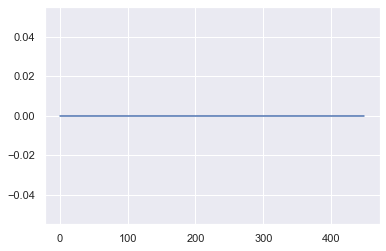

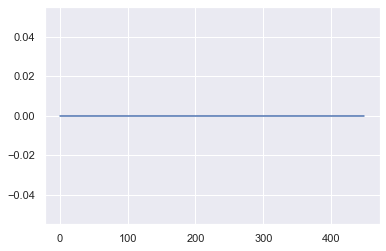

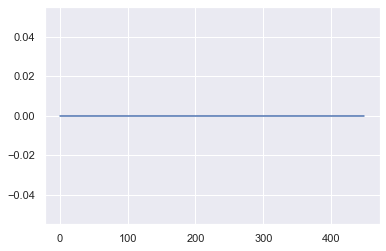

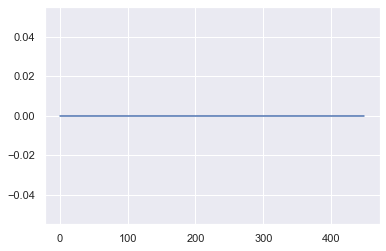

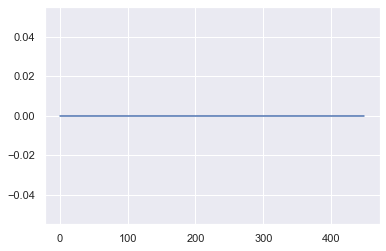

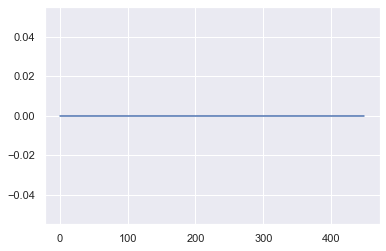

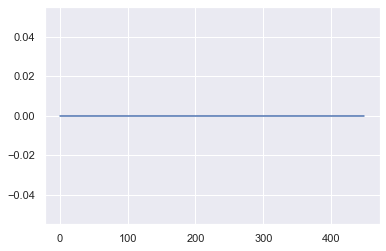

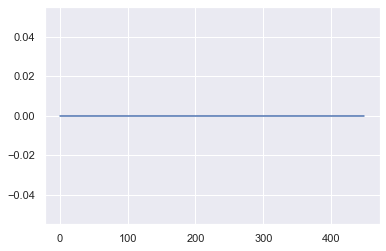

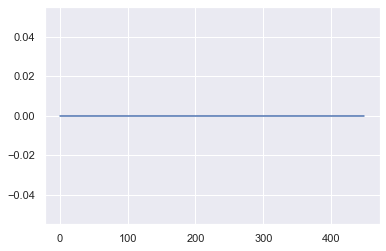

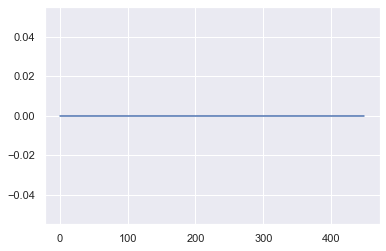

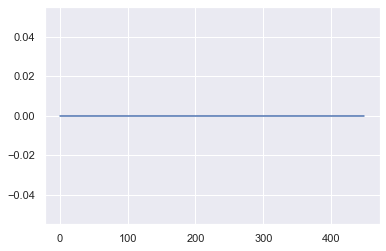

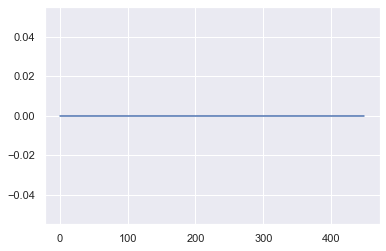

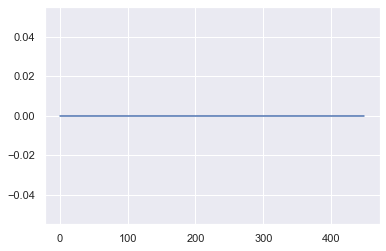

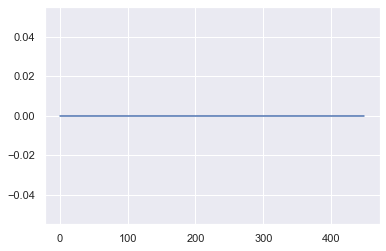

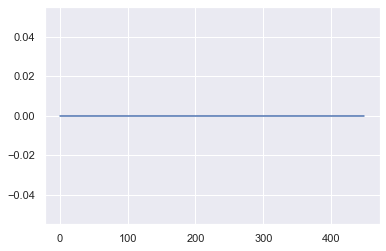

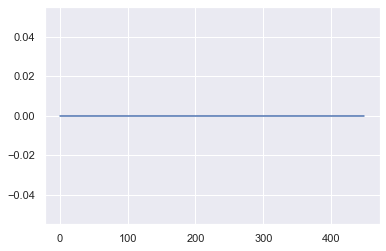

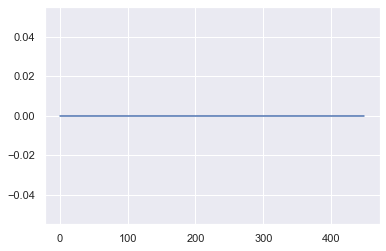

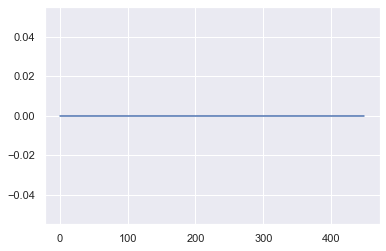

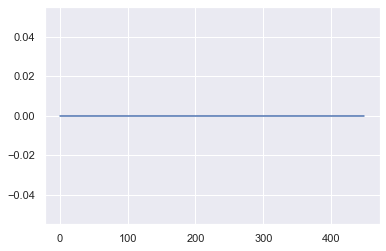

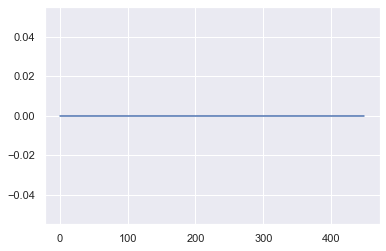

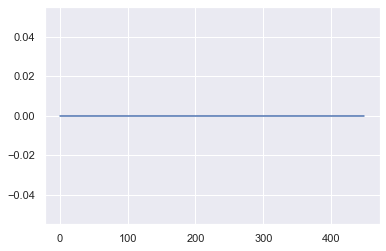

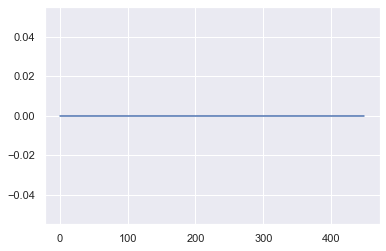

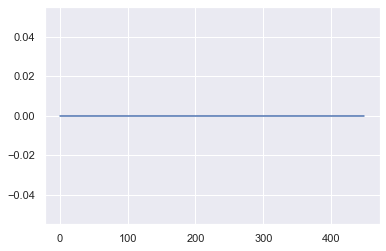

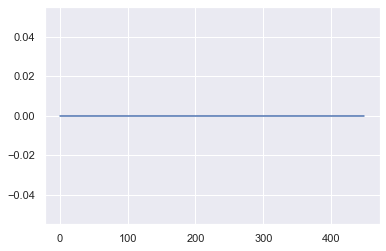

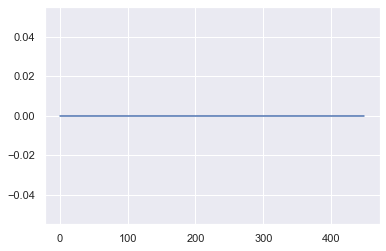

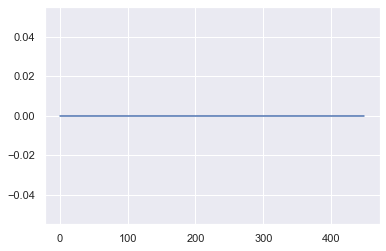

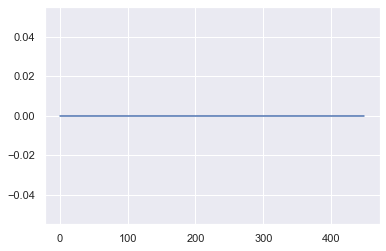

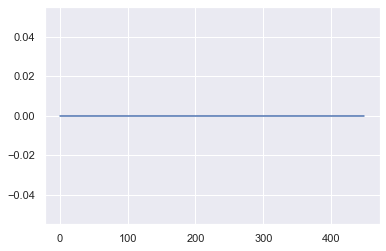

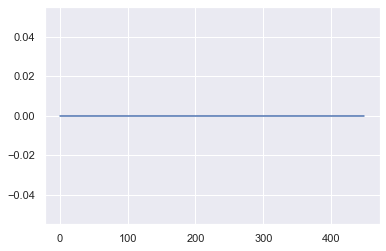

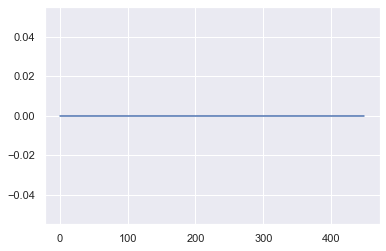

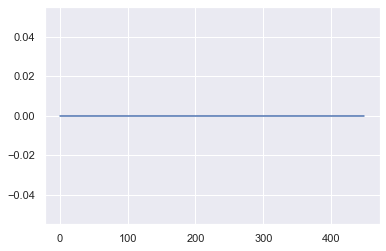

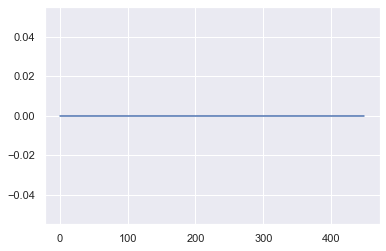

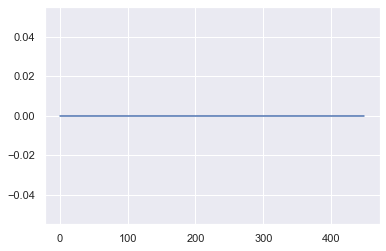

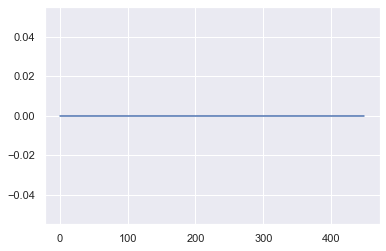

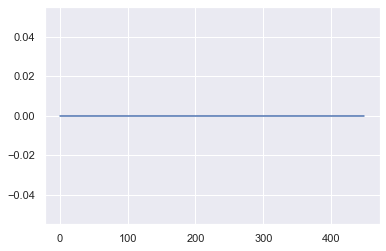

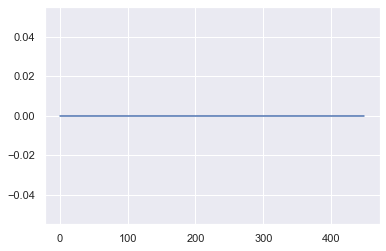

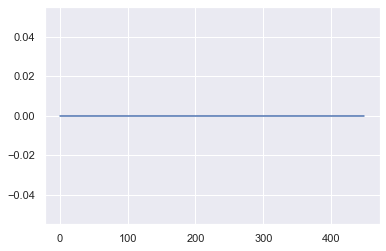

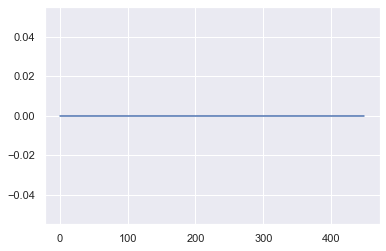

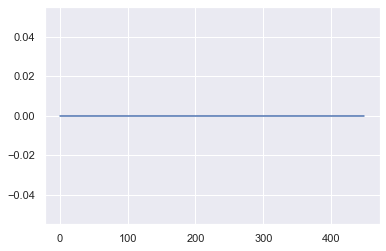

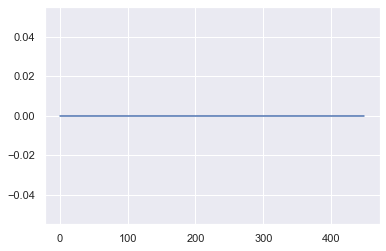

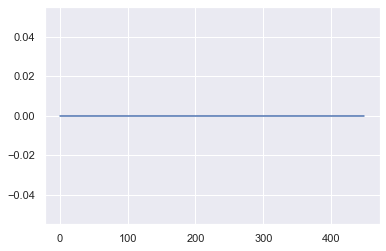

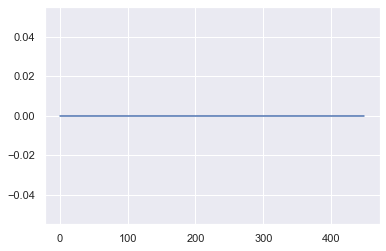

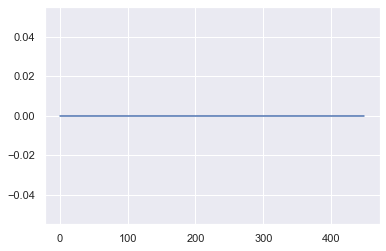

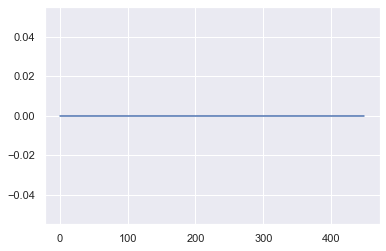

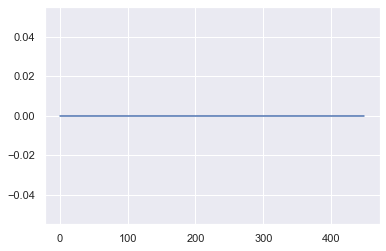

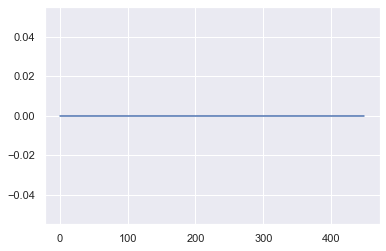

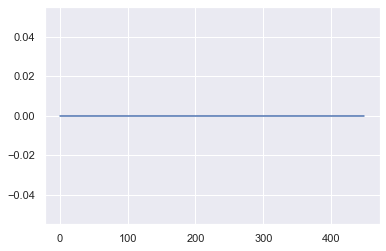

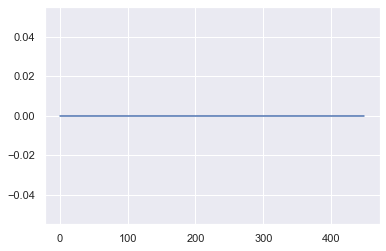

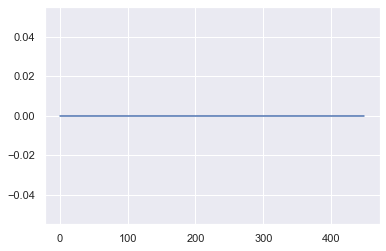

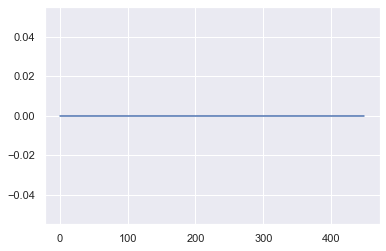

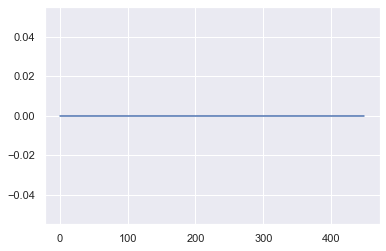

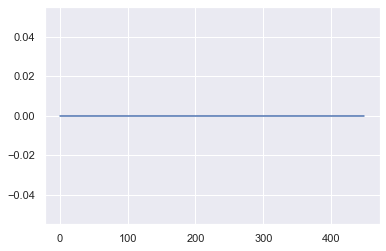

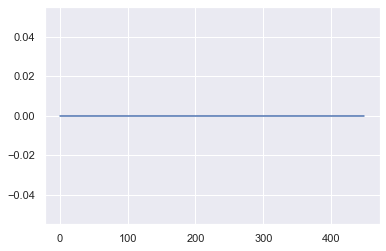

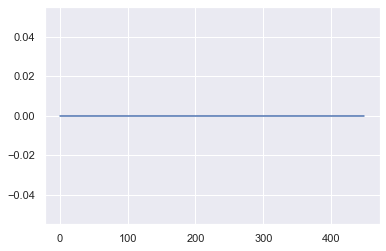

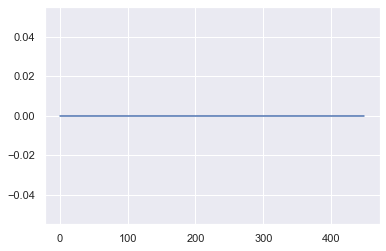

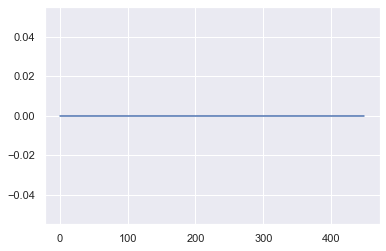

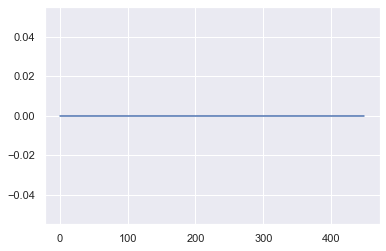

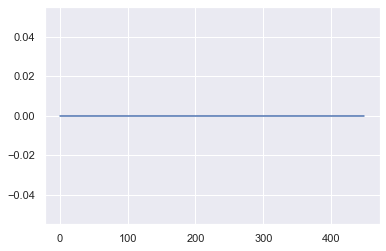

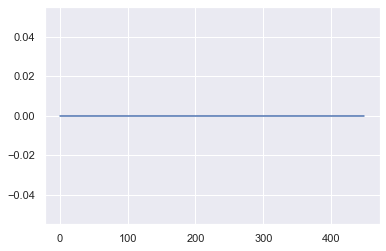

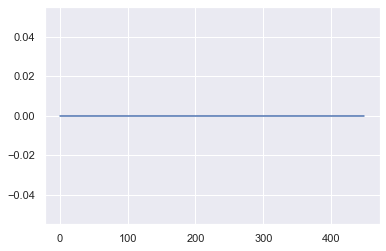

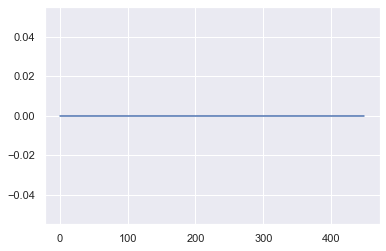

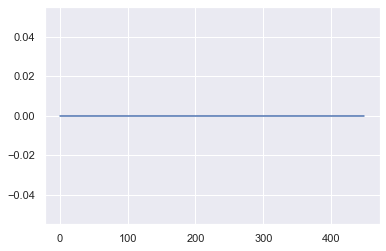

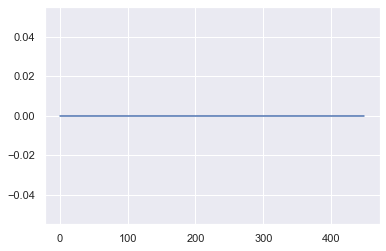

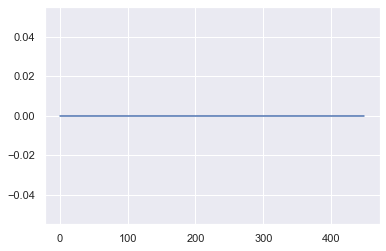

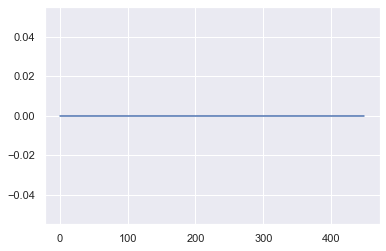

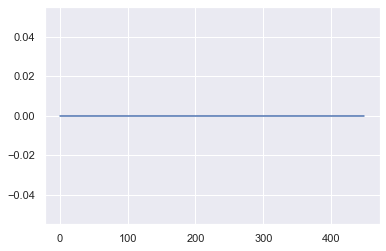

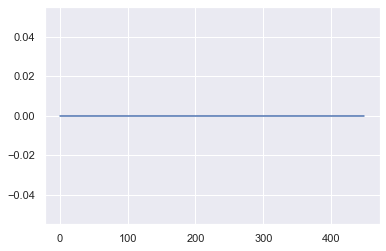

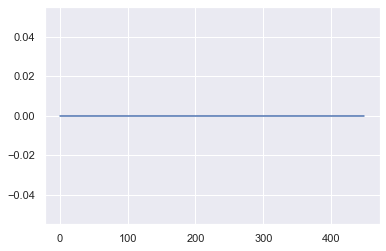

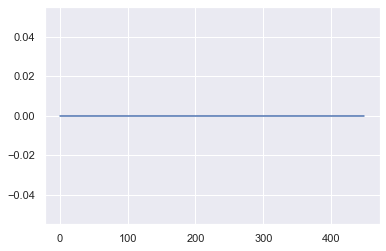

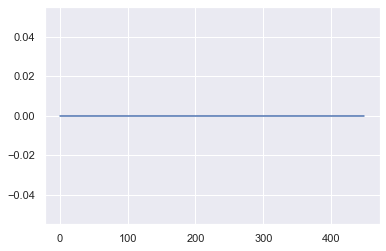

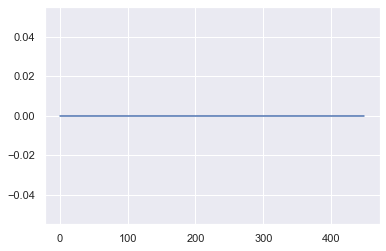

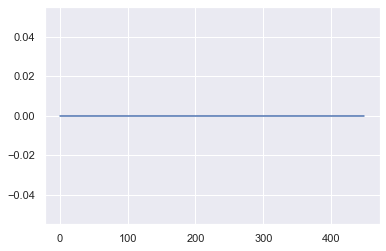

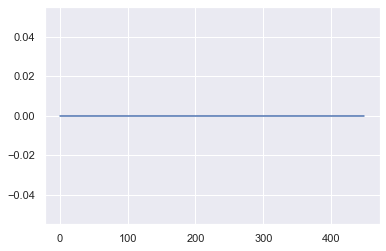

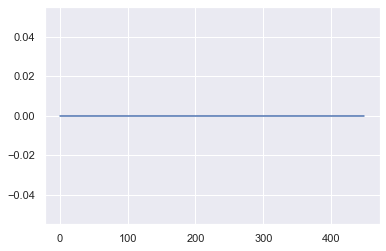

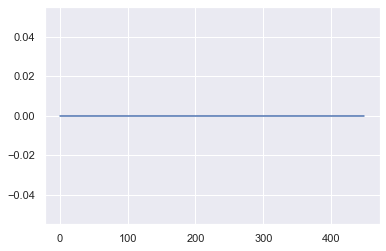

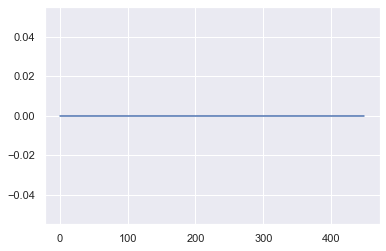

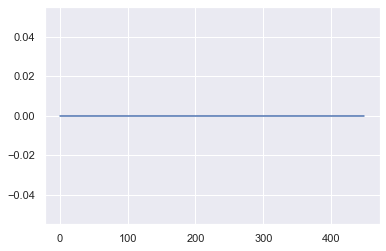

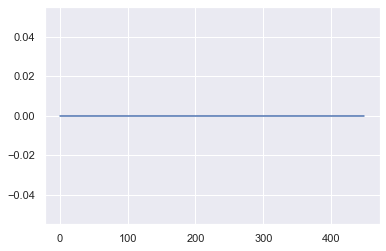

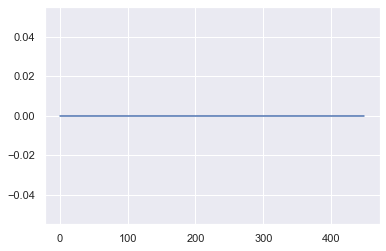

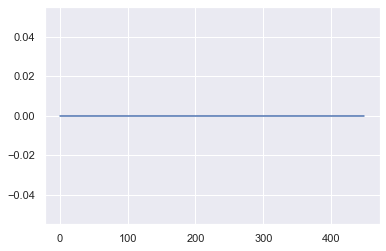

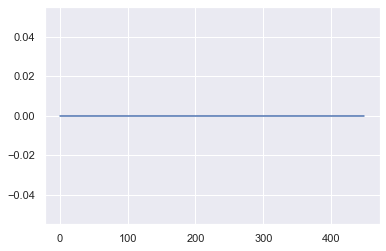

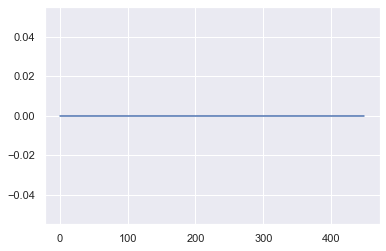

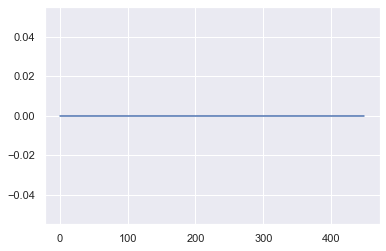

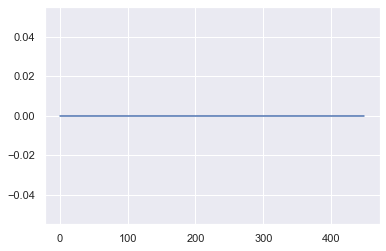

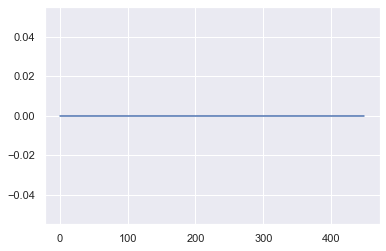

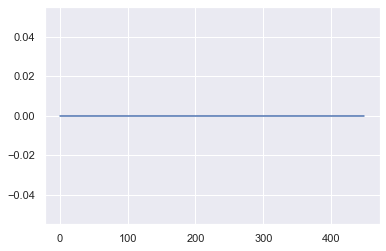

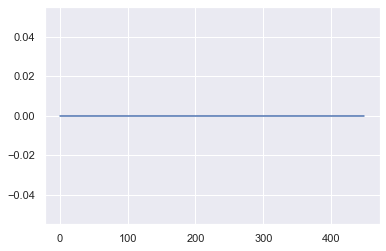

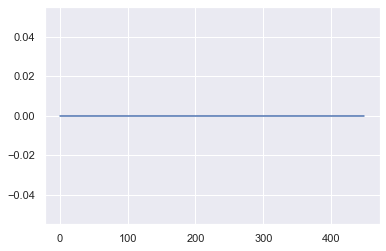

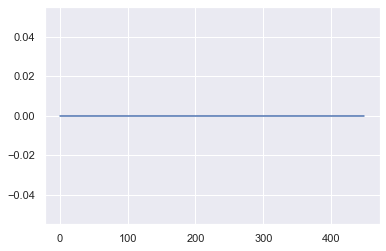

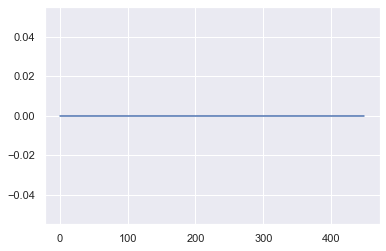

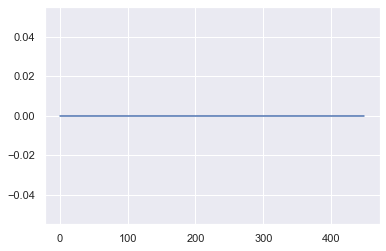

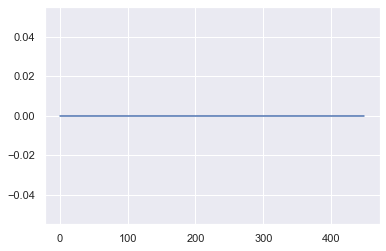

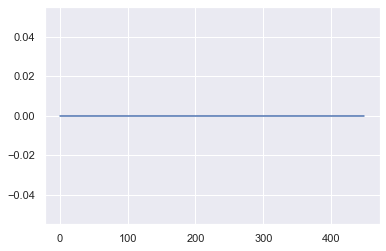

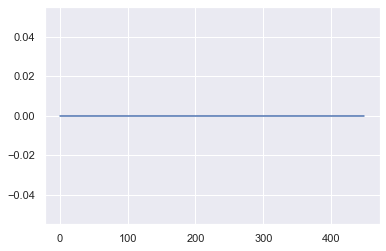

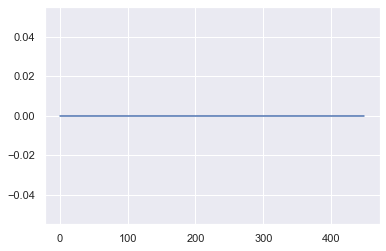

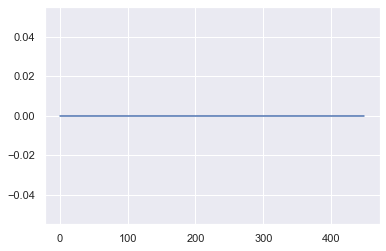

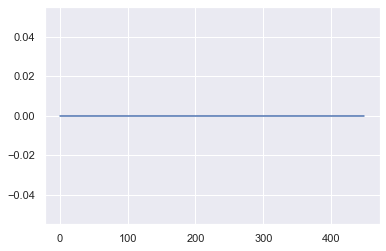

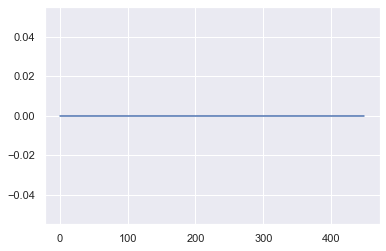

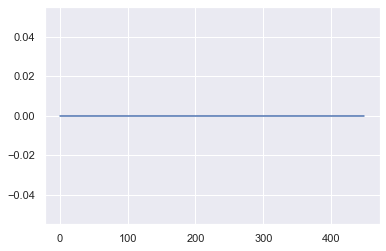

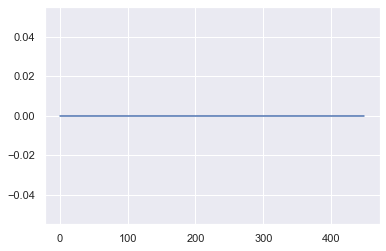

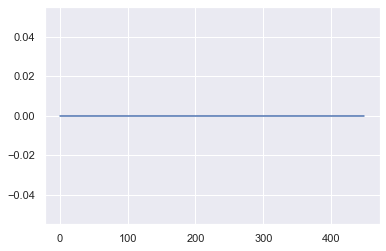

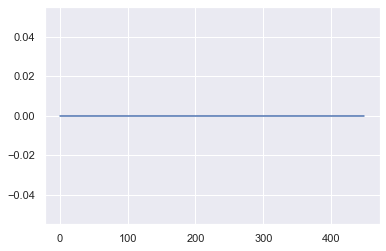

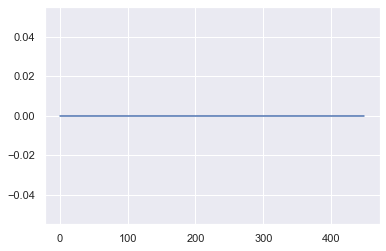

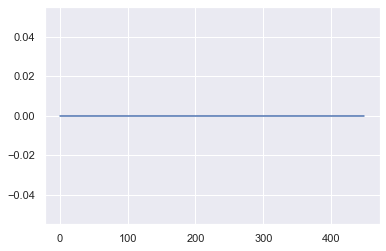

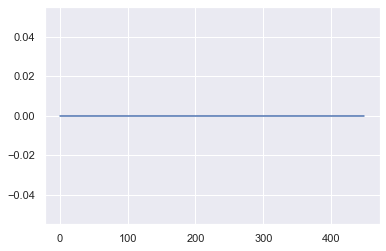

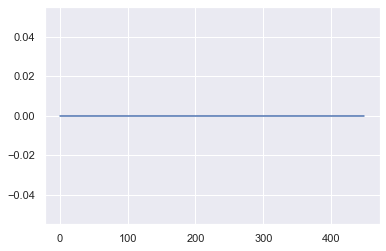

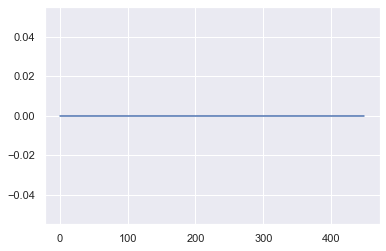

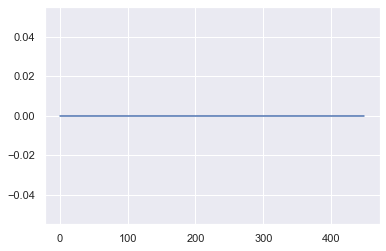

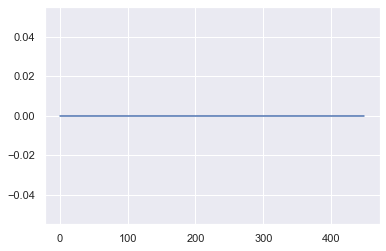

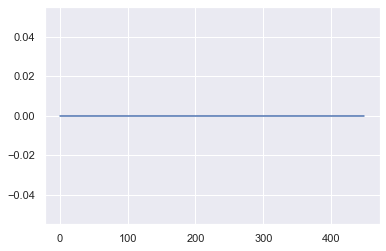

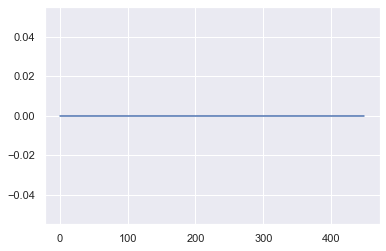

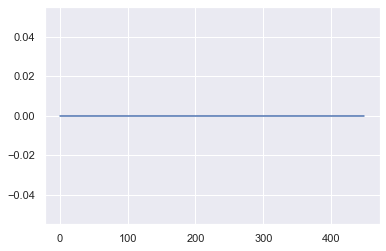

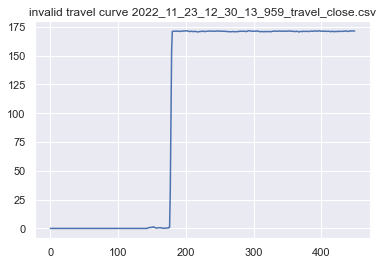

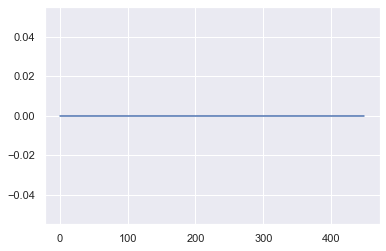

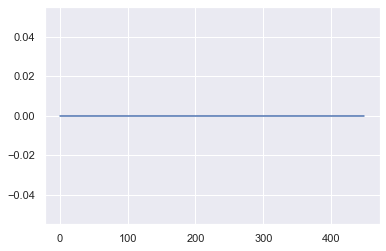

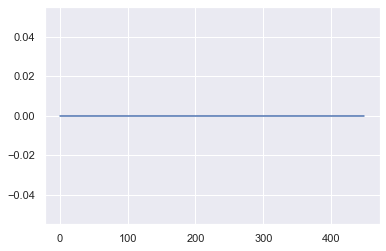

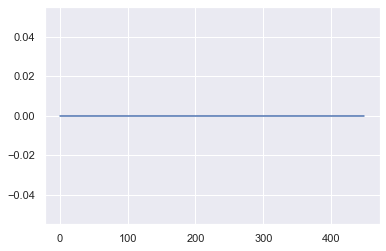

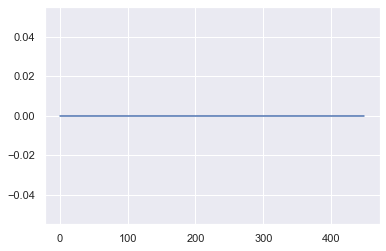

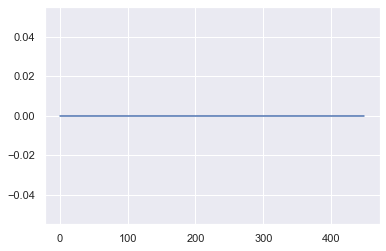

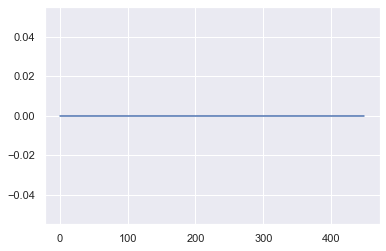

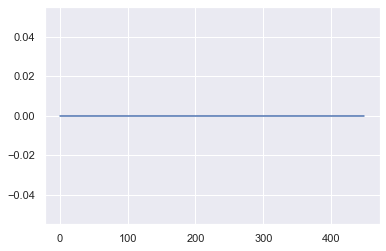

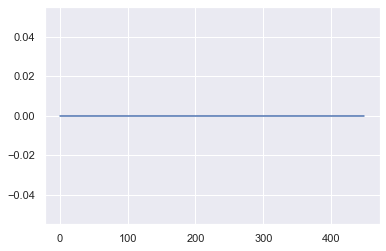

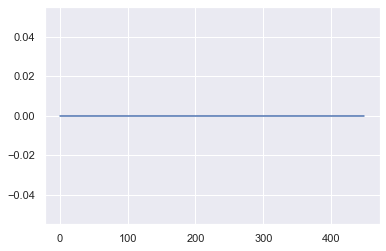

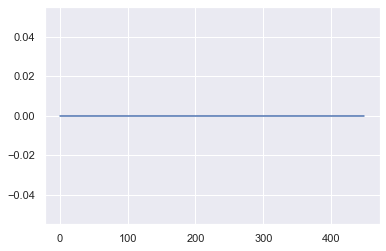

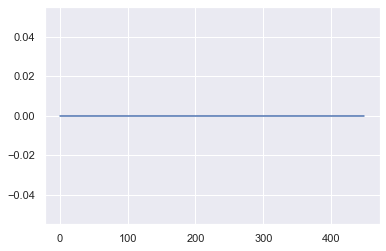

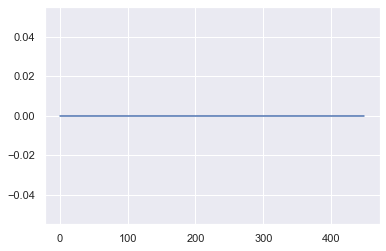

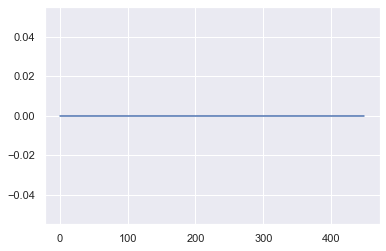

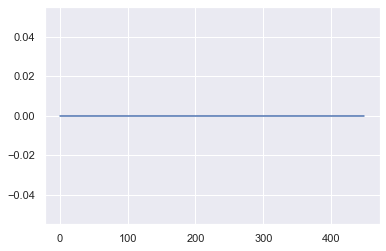

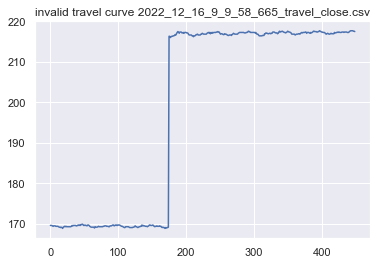

In [5]:
# pamameters for eachy O/C operation are saved in lists
travel_list, travel_invalid_list= [], []
open_spd_list, close_spd_list= [], []
open_rebounce_list, open_overshoot_list, close_overshoot_list = [], [], []
open_time_list, close_time_list, open_rms_list, close_rms_list = [], [], [], []
invalid_count = 0

# search all files
for cur_dir, dirs, files in os.walk(dir_noreclosing_washed):
    for file in files[:]:
        # if file is a travel curve
        if ('travel_open' in file) | ('travel_close' in file):
            case = ME.MechOperMconfig(cur_dir, file, path_config)          
            head = np.mean(case.angle_arr[:50])
            tail = np.mean(case.angle_arr[-50:])
            # print(head,tail)
            travel, angle_open, angle_close = case.cal_travel(head=head, tail=tail)
            if (travel <= 60) & (travel >= 30): 
                travel_list.append(travel)
                speed = case.cal_speed(travel, angle_close)
                if 0 < speed < 10:
                    if case.oper_type == 'C':
                        close_spd_list.append(speed)
                        overshoot, overshoot_idx = case.cal_overshoot_close(angle_close)
                        close_overshoot_list.append(overshoot)
                            # plt.figure()
                            # plt.title(file)
                            # plt.plot(case.angle_arr)
                            # plt.scatter(overshoot_idx, 
                            #             case.angle_arr[overshoot_idx],
                            #             c='r')
                        
                        # find the corresponding coil current file
                        # print(file)
                        datetime_str = file[:file.find('_travel_close.csv')]
                        # print(datetime_str)
                        file_current_close = datetime_str + '_current_close.csv'
                        # print(file_current_close)
                        if file_current_close in files:
                            # read close coil current data
                            coil_current_df = pd.read_csv(os.path.join(cur_dir, file_current_close), 
                                                              header=0)
                            coil_current_arr =np.array(coil_current_df['data'])

                            # calculate current parameters
                            try:
                                coil_start, _, _, _, coil_rms = case.current_features(coil_current_arr)
                            except:
                                plt.figure()
                                plt.plot(coil_current_arr)
                            # print('coil rms:', coil_rms)
                            close_rms_list.append(coil_rms)
                            
                            # calculate operation time
                            oper_time = case.cal_op_time(coil_start)
                            close_time_list.append(oper_time)
                        else:
                            print('no close current curve found')
                            

                    elif case.oper_type == 'O':
                        open_spd_list.append(speed)
                        rebounce, rebounce_idx ,overshoot, overshoot_idx = case.cal_rebounce_overshoot_open(angle_open)
                        open_rebounce_list.append(rebounce)
                        open_overshoot_list.append(overshoot)
                        # if overshoot == 0:
                        #     plt.figure()
                        #     plt.title(file)
                        #     plt.plot(case.angle_arr)
                        #     plt.scatter(overshoot_idx, 
                        #                 case.angle_arr[overshoot_idx],
                        #                 c='r')
                        #     plt.scatter(rebounce_idx, 
                        #                 case.angle_arr[rebounce_idx],
                        #                 c='g')
                                                # find the corresponding coil current file

                        datetime_str = file[:file.find('_travel_open.csv')]
                        file_current_open = datetime_str + '_current_open.csv'

                        if file_current_open in files:
                            # read close coil current data
                            coil_current_df = pd.read_csv(os.path.join(cur_dir, file_current_open), 
                                                              header=0)
                            coil_current_arr =np.array(coil_current_df['data'])

                            # calculate current parameters
                            try:
                                coil_start, _, _, _, coil_rms = case.current_features(coil_current_arr)
                            except:
                                plt.figure()
                                plt.plot(coil_current_arr)
                            # print('coil rms:', coil_rms)
                            open_rms_list.append(coil_rms)
                            
                            # calculate operation time
                            oper_time = case.cal_op_time(coil_start)
                            open_time_list.append(oper_time)
                        else:
                            print('no open current curve found')
                    else:
                        pass
                else:   
                    print('speed is out of range: ', speed)
                    invalid_count += 1
                    plt.figure()
                    plt.title('invalid travel curve {}'.format(file))
                    plt.plot(case.angle_arr)
            else:
                invalid_count += 1
                plt.figure()
                plt.title('invalid travel curve {}'.format(file))
                plt.plot(case.angle_arr)

travel_arr = np.array(travel_list)
open_spd_arr = np.array(open_spd_list)
close_spd_arr = np.array(close_spd_list)
open_rebounce_arr = np.array(open_rebounce_list)
open_overshoot_arr = np.array(open_overshoot_list)
close_overshoot_arr = np.array(close_overshoot_list)
open_time_arr = np.array(open_time_list)
close_time_arr = np.array(close_time_list)



## 3.1_Travel

In [ ]:

print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std', 
                                                                        'start', 'end', 
                                                                        'max', 'mean', 
                                                                        'median', 'min', 
                                                                        'span', 'alm_u', 
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(travel_arr, 
                                  title='travel', 
                                  ylabel='travel in degree')


## 3.2_open/close speed

In [ ]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std', 
                                                                        'start', 'end', 
                                                                        'max', 'mean', 
                                                                        'median', 'min', 
                                                                        'span', 'alm_u', 
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_spd_arr, 
                                  title='open speed', 
                                  ylabel='deg/ms')
ME.MechOperMconfig.para_dist_plot(close_spd_arr, 
                                  title='close speed', 
                                  ylabel='deg/ms')

## 3.3_Open/close rebounce & overshoot

In [ ]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std', 
                                                                        'start', 'end', 
                                                                        'max', 'mean', 
                                                                        'median', 'min', 
                                                                        'span', 'alm_u', 
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_rebounce_arr, 
                                  title='open rebounce', 
                                  ylabel='deg')
ME.MechOperMconfig.para_dist_plot(open_overshoot_arr, 
                                  title='open overshoot', 
                                  ylabel='deg')
ME.MechOperMconfig.para_dist_plot(close_overshoot_arr, 
                                  title='close overshoot', 
                                  ylabel='deg')

## 3.4_Open/close time

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
open time         5.40    23.46   25.20   38.00   28.32   25.20   22.00   16.00   91.00   9.00    
close time        1.96    33.44   33.14   44.40   34.94   34.40   13.20   31.20   35.00   65.00   


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

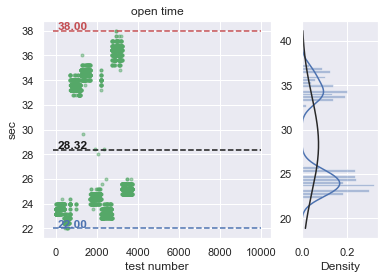

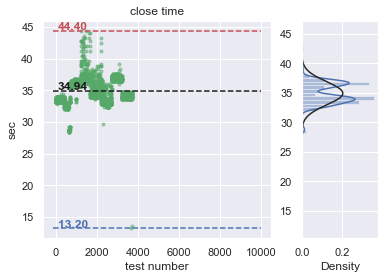

In [6]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std', 
                                                                        'start', 'end', 
                                                                        'max', 'mean', 
                                                                        'median', 'min', 
                                                                        'span', 'alm_u', 
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_time_arr, 
                                  title='open time', 
                                  ylabel='sec')
ME.MechOperMconfig.para_dist_plot(close_time_arr, 
                                  title='close time', 
                                  ylabel='sec')

## 3.5_Open/close coil current